<a href="https://colab.research.google.com/github/Clarana12/puc-ciencia-de-dados-e-analytics-mvp-sprint2/blob/main/MVP_AnaClaraRodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 2 - Machine Learning e Analytics
# Pontifícia Universidade Católica PUC-Rio
### Aluno (a). Ana Clara Rodrigues
#### MVP Sprint 2 (Abril/2024)



## 1.0 Definição do Problema


**Descrição do Problema**

O problema em questão envolve o diagnóstico precoce do Transtorno do Espectro do Autismo (TEA) em crianças. O TEA é uma condição complexa que afeta o desenvolvimento neurológico e comportamental, e a identificação precoce é crucial para intervenções eficazes e melhores resultados a longo prazo. No entanto, o diagnóstico do TEA pode ser desafiador, muitas vezes exigindo avaliações detalhadas por profissionais especializados.

**Qual o objetivo desse MVP?**

Nesse contexto, propomos o desenvolvimento de um modelo preditivo baseado em questionários preenchidos pelos pais ou cuidadores das crianças. O objetivo é criar um sistema de triagem que possa identificar potenciais sinais precoces de autismo com base nas respostas fornecidas. Isso permitiria uma triagem mais rápida e acessível, facilitando o encaminhamento para avaliações mais detalhadas por profissionais de saúde especializados.

**Como fazer isso?**

Nosso conjunto de dados será composto por características comportamentais relevantes, cuidadosamente selecionadas para maximizar a eficiência da triagem do TEA. Ao desenvolver esse modelo, buscamos contribuir para uma abordagem mais eficaz no rastreamento e diagnóstico precoce do autismo em crianças, visando melhorar os resultados e o acesso a intervenções adequadas.

**Premissas e Hipóteses:**

**Premissa:** O diagnóstico precoce do Transtorno do Espectro Autista (TEA) é essencial para reduzir os custos de saúde, porém os longos tempos de espera e procedimentos onerosos ressaltam a necessidade urgente de métodos de triagem eficazes.

**Hipótese:** Um modelo de machine learning treinado com um conjunto de dados utilizado para o rastreamento do autistmo em crianças, com características comportamentais relevantes, visando aprimorar a eficiência da triagem de TEA.

**Restrição ou Condição:** Não houve restrições ao selecionar os dados onde foi aproveitado todo o dataset.


**Sobre o *dataset* utilizado**

O dataset usado neste projeto será o **Autism screening data for toddlers** proveniente originalmente do https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers?resource=download

Como seus dados estão rotulados, trata-se de um **aprendizado supervisionado**.

O conjunto de dados foi desenvolvido pelo Dr. Fadi Fayez Thabtah usando um aplicativo móvel chamado ASDTests para rastrear autismo em crianças pequenas.

**Informações sobre os atributos:**
1. **Case_No** - Um ID para cada criança.
2. **A1** - Seu filho olha para você quando você chama o nome dele? (númerico)
3. **A2** - É fácil para você manter o contato visual com seu filho? (numérico)
4. **A3** - Seu filho aponta para indicar algo? (numérico)
5. **A4** - Seu filho aponta para compartilhar interesse com vc? (numérico)
6. **A5** - Seu filho finge? (numérico)
7. **A6** - Seu filho segue para onde você está olhando? (numérico)
8. **A7** - Se você ou outra pessoa da família está visivelmente chateada, seu filho mostra sinanis de querer confortá-los? (numérico)
9. **A8** - Você descreveria as primeiras palavras de seu filho como? (numérico)
10. **A9** - Seu filho usa gestos simples? (numérico)
11. **A10** - Seu filho não encara nada sem propósito aparente? (numérico)
12. **Age_monts** - A idade da pessoa em meses. (numérico)
13. **Qchat-10-Score** - Pontuação total do Qchat.
14. **Sexo** - Gênero do indivíduo (m/f).
15. **Ethnicity** - Contém informações sobre as etnias. (sim/não)
16. **Jaundice** - Informa se a criança nasceu com icterícia.
17. **Family_mem_with_ASD** - Informa se a familia da criança tem algum membro com ASD/TEA. (sim/não)
18. **Quem completou o teste** - Quem foi a pessoa que fez o teste.
19. **Classe/ASD Traits** - Possui caracteristicas do TEA? (sim/não)

**OBS.:** A1 - A10 são algumas perguntas e suas respostas são dadas como rótulos '1' ou '0'.


## 2.0 Importações Necessárias



**Importando as Bibliotecas**

---
Nessa seção iremos importar as bibliotecas necessárias

In [879]:
# Fazendo os imports das bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,StratifiedKFold,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from pprint import pprint
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score,confusion_matrix

Verificaremos a versão da matplotlib instalada.

In [880]:
# Verificando a versão da matplotlib instalada
print(f"A versão MatPlotLib instalada é a {mpl.__version__}")

A versão MatPlotLib instalada é a 3.7.1


Também configuraremos o MVP para não exibir mensagens de aviso.

In [881]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

**Carga de Dados**

---
Nessa seção iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar de um arquivo .csv disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [882]:
# Importando o arquivo em formato csv hospedado em meu Github
url = "https://raw.githubusercontent.com/Clarana12/puc-ciencia-de-dados-e-analytics-mvp-sprint2/main/Toddler%20Autism%20dataset%20July%202018.csv"

# Cabeçalho das colunas
colunas = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','Age_Mons','Qchat-10-Score','Sex',
           'Ethnicity','Jaundice','Family_mem_with_ASD','Who completed the test','Class/ASD Traits']

tea_data = pd.read_csv(url,skiprows=1, names=colunas, delimiter = ',')

tea_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


## 3.0 Análise Exploratória de Dados
---
Nesta primeira etapa será realizada uma análise exploratória do dataset, onde iremos verificar como os dados estão organizados e como eles se relacionam, serão determinadas as suas dimensões, tipos de variáveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

**Dimensões e Informações**

---
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

Checaremos a identificação dos nomes dos atributos de coluna no *dataset*.

In [883]:
# Mostrando o nome dos atributos do dataset
tea_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits'],
      dtype='object')

Iremos renomear algumas colunas para melhor identificação.

In [884]:
tea_data = tea_data.rename(columns={"Age_Mons":"Age_Months",
                        "Family_mem_with_ASD":"Family_Member_With_ASD",
                        "Class/ASD Traits": "ASD_Traits"})
tea_data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_Member_With_ASD', 'Who completed the test', 'ASD_Traits'],
      dtype='object')

In [885]:
tea_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_Member_With_ASD,Who completed the test,ASD_Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


Checaremos a seguir o número de linhas e colunas do *dataset*.

In [886]:
# Mostra as dimensões (linhas e colunas) do dataset
print(tea_data.shape)

(1054, 18)


Podemos verificar acima que o dataset tem 1054 linhas (entradas) de 18 colunas (atributos).



Mostraremos a seguir a estrutura dos atributos do *dataset*. Com essas informações verificaremos os tipos dos atributos do *dataset* para identificar quais deles poderemos fazer suas possíveis conversões.


In [887]:
# Mostra as informações do dataset
print(tea_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1054 entries, 1 to 1054
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A2                      1054 non-null   int64 
 2   A3                      1054 non-null   int64 
 3   A4                      1054 non-null   int64 
 4   A5                      1054 non-null   int64 
 5   A6                      1054 non-null   int64 
 6   A7                      1054 non-null   int64 
 7   A8                      1054 non-null   int64 
 8   A9                      1054 non-null   int64 
 9   A10                     1054 non-null   int64 
 10  Age_Months              1054 non-null   int64 
 11  Qchat-10-Score          1054 non-null   int64 
 12  Sex                     1054 non-null   object
 13  Ethnicity               1054 non-null   object
 14  Jaundice                1054 non-null   object
 15  Family_Me

Podemos observar que o conjunto de dados possui 6 colunas de tipo string, enquanto o restante é composto por dados numéricos. Além disso, não há valores **nulos** presentes, portanto não é necessário realizar tratamento de dados faltantes.







Verificaremos abaixo o número de valores únicos de cada atributo.

In [888]:
# Verificando o número de valores únicos dos atributos
tea_data.nunique()

A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age_Months                25
Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family_Member_With_ASD     2
Who completed the test     5
ASD_Traits                 2
dtype: int64

Percebemos que o nosso *dataset* não possui atributo de coluna com um único valor. Aqueles que possuem apenas dois valores são representados por "Sim/Não" ou "0/1".

Isso também nos leva a perceber que não há redundância de linhas no nosso *dataset*.

In [889]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
tea_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
A1,1054.0,0.563567,0.496178,0.0,0.0,1.0,1.0,1.0
A2,1054.0,0.448767,0.497604,0.0,0.0,0.0,1.0,1.0
A3,1054.0,0.401328,0.490400,0.0,0.0,0.0,1.0,1.0
A4,1054.0,0.512334,0.500085,0.0,0.0,1.0,1.0,1.0
A5,1054.0,0.524668,0.499628,0.0,0.0,1.0,1.0,1.0
A6,1054.0,0.576850,0.494293,0.0,0.0,1.0,1.0,1.0
A7,1054.0,0.649905,0.477226,0.0,0.0,1.0,1.0,1.0
A8,1054.0,0.459203,0.498569,0.0,0.0,0.0,1.0,1.0
A9,1054.0,0.489564,0.500128,0.0,0.0,0.0,1.0,1.0
A10,1054.0,0.586338,0.492723,0.0,0.0,1.0,1.0,1.0


Durante a análise exploratória dos dados, notamos que os atributos Sex, Ethnicity, Jaundice, Family Member with ASD, Who completed the test e ASD Traits não estão incluídos no resumo estatístico. Para permitir sua utilização na modelagem, faremos a conversão dessas colunas categóricas em valores numéricos utilizando o método de codificação conhecido como Label Encoding.

**Conversão das Colunas Categóricas**

---

In [890]:
# converte o atributo Sex para 0 e 1 , sendo m = 1 e f = 0
tea_data['Sex'] = tea_data['Sex'].replace('m', 1)  # masculino
tea_data['Sex'] = tea_data['Sex'].replace('f', 0) #feminino


# converte o atributo Jaundice(Nasceu com icterícia) para 0 e 1 , sendo Yes = 1 e No = 0
tea_data['Jaundice'] = tea_data['Jaundice'].replace('yes', 1)  # yes
tea_data['Jaundice'] = tea_data['Jaundice'].replace('no', 0) #no


# converte o atributo Family_mem_with_ASD(Familiar com TEA) para 0 e 1 , sendo Yes = 1 e No = 0
tea_data['Family_Member_With_ASD'] = tea_data['Family_Member_With_ASD'].replace('yes', 1)  # yes
tea_data['Family_Member_With_ASD'] = tea_data['Family_Member_With_ASD'].replace('no', 0) #no


# converte o atributo Class/ASD Traits para 0 e 1 , sendo Yes = 1 e No = 0
tea_data['ASD_Traits'] = tea_data['ASD_Traits'].replace('Yes', 1)
tea_data['ASD_Traits'] = tea_data['ASD_Traits'].replace('No', 0)


## 4.0 Visualizações
---
Nesta seção, exploraremos perguntas e análises gráficas baseadas em atributos individuais. Por meio de visualizações unimodais, examinaremos como os atributos isolados podem influenciar nossos dados e ajudar na compreensão de padrões e distribuições em nosso modelo. Essas análises fornecerão insights valiosos sobre o comportamento de cada atributo e sua relação com a variável de interesse.


**Histograma**

---
Para avaliação dos dados númericos iremos utilizar o histograma que é útil para visualizar a distribuição dos dados em uma variável numérica. Eles podem ajudar a identificar padrões de distribuição, como normalidade, assimetria e presença de outliers.


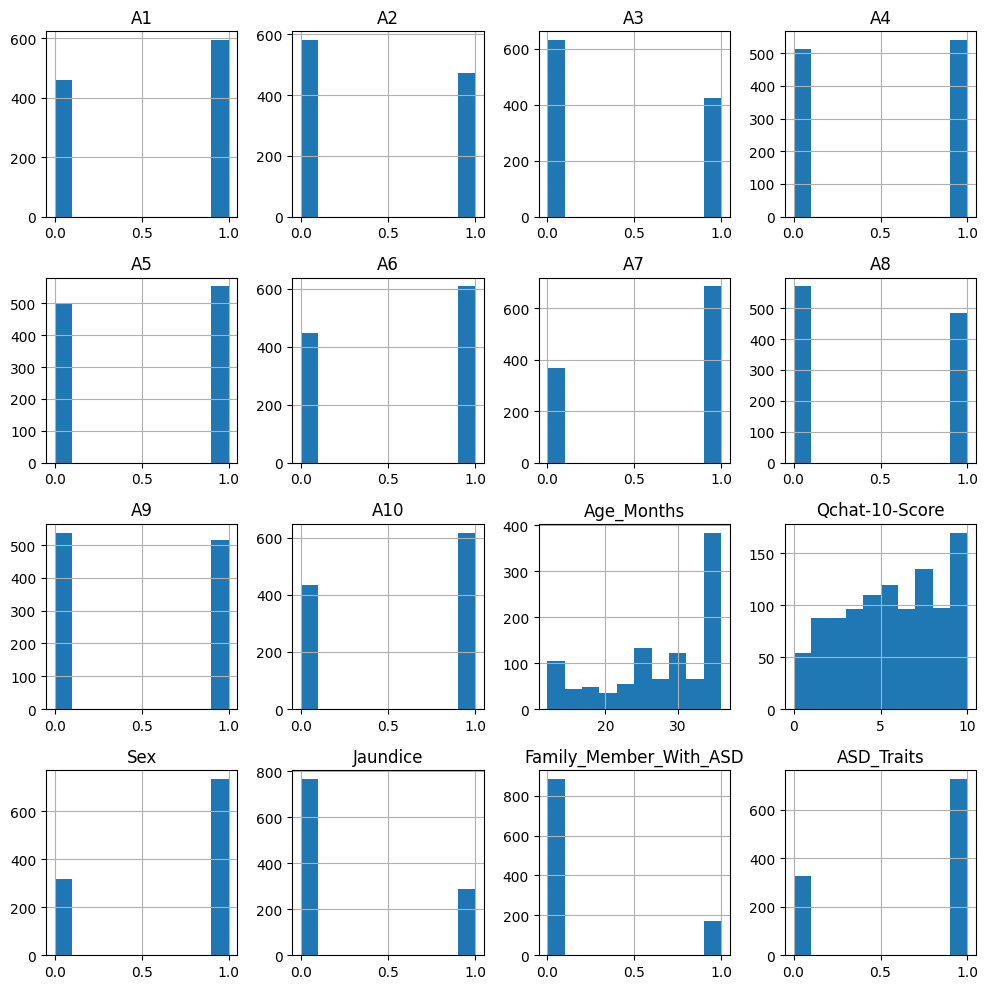

In [891]:
# Histograma
tea_data.hist(figsize = (10,10))
plt.tight_layout()
plt.show()

Optei por excluir a coluna **Qchart-10-Score**, uma vez que esta atribui uma pontuação que poderia potencialmente influenciar o resultado da classificação.

Ao manter esse atributo, existe o risco de o modelo se tornar sobre-ajustado aos dados de treinamento, prejudicando sua capacidade de generalização para novos dados.

**Qual é a porcentagem de crianças afetadas pelo TEA?**

---


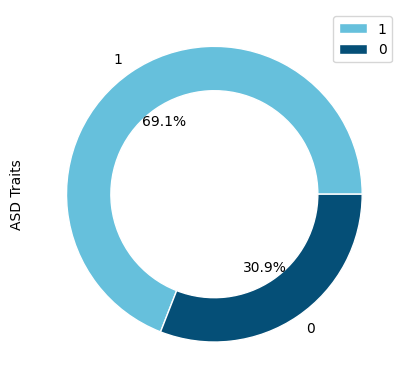

In [892]:
# Criar o gráfico de pizza com a cor azul
tea_data["ASD_Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'), colors=['#66C0DC', '#054F77'],label="ASD Traits")

# Definir os rótulos da legenda
labels = tea_data["ASD_Traits"].value_counts().index

# Adicionar legenda
plt.legend(labels=labels, loc="upper right")

# Exibir o gráfico
plt.show()



Pode-se estimar que cerca de **69,1%** das crianças no mundo são afetadas pelo Transtorno do Espectro do Autismo.

**Quais comportamentos de A1 a A10 mais contribuem nas taxas de TEA?**

---



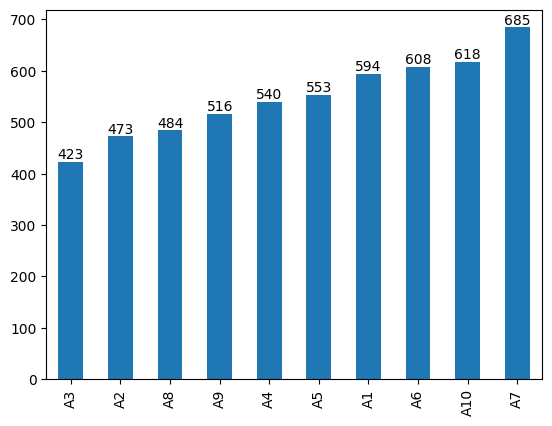

In [893]:
ax = tea_data.iloc[:, :10].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);


Foi observado nos dados que a maioria das crianças demonstrava cuidado em relação aos pais quando estes estavam visivelmente chateados. Por outro lado, apenas 423 crianças manifestaram um desejo por brinquedos ou algo semelhante.

**Countplots**

---
Para avaliação dos dados categóricos iremos utiliar os countplots que são gráficos que mostram a distribuição da frequência de ocorrência de cada valor único em uma variável categórica.

Esses gráficos são úteis para visualizar a distribuição de dados categóricos e identificar padrões ou discrepâncias nos dados.

Neste caso específico, vamos exibir um countplot para cada variável categórica presente no conjunto de dados, organizando-os em uma grade para facilitar a comparação entre as variáveis.

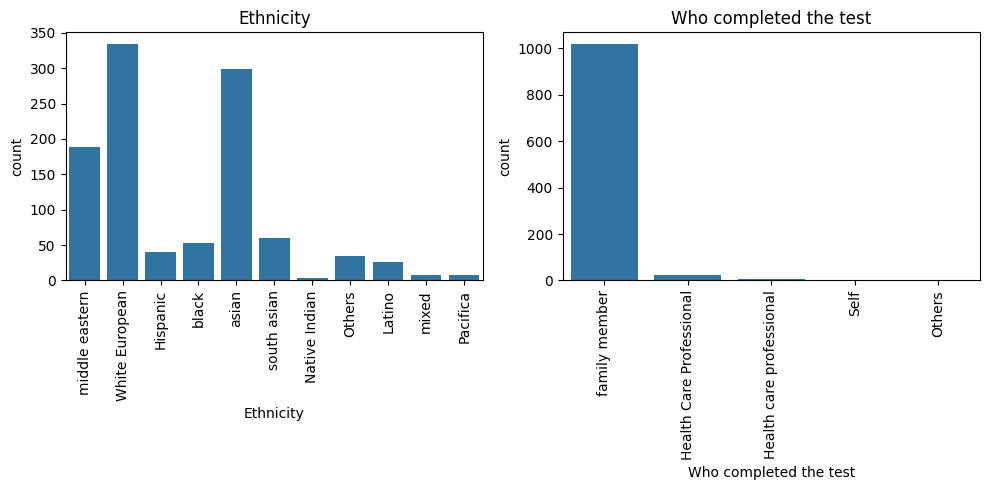

In [894]:
# Selecionar apenas as colunas categóricas
categorical_columns = tea_data.select_dtypes(include=['object']).columns

# Visualiação de countplots para cada atributo categórico
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes = axes.ravel()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=tea_data[col], ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age_Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

**Conclusão**

---

Com base nas visualizações Unimodais concluímos que há uma disparidade significativa entre os gêneros masculino e feminino, com uma proporção de mais que o dobro de casos masculinos em relação aos femininos.

Além disso, os dados revelam que em todos os casos analisados, algumas crianças apresentavam o Transtorno do Espectro Autista (TEA), enquanto membros de suas famílias não tinham o diagnóstico. Isso sugere que o TEA não é exclusivamente genético.

Notavelmente, constatamos que o dobro de crianças positivas para o autismo não apresentaram histórico de icterícia neonatal.

Constatamos que os atributos **Who completed the test** e **Ethnicity** não apresentam relevância para o objetivo do nosso estudo. Portanto, optamos por **removê-los** durante a etapa de pré-processamento dos dados.

## 5.0 Pré-Processamento de dados



**Tratamento de Missings e Limpeza**

---

Nesta etapa, procuraremos identificar e eliminar quaisquer irregularidades presentes no conjunto de dados, visando aprimorar e elevar sua qualidade. O processo de limpeza de dados inclui a verificação da coerência das informações, a correção de eventuais erros e a gestão de valores nulos e/ou redundantes, seja preenchendo-os adequadamente ou removendo-os.

Produziremos nesse momento o tratamento e as manipulações em um *dataset* provisório, preservando o *dataset* original.

In [895]:
# Salvando um NOVO dataset para tratamento de missings, com cuidado para não sobrescrever o dataset original
tea_data_tratamento = tea_data

Como já havíamos verificado anteriormente, não temos redundância no *dataset*.

In [896]:
tea_data_tratamento.nunique()

A1                         2
A2                         2
A3                         2
A4                         2
A5                         2
A6                         2
A7                         2
A8                         2
A9                         2
A10                        2
Age_Months                25
Qchat-10-Score            11
Sex                        2
Ethnicity                 11
Jaundice                   2
Family_Member_With_ASD     2
Who completed the test     5
ASD_Traits                 2
dtype: int64

Confirmaremos a existência de dados nulos (*NULL*) para cada atributo do *dataset*.

In [897]:
# # Verificando dados nulos nos atributos
tea_data_tratamento.isnull().sum()

A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Months                0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_Member_With_ASD    0
Who completed the test    0
ASD_Traits                0
dtype: int64

Corfome visto anteriormente não possuimos valores nulos para tratamento.

 **Verificação de valores duplicados**

 ---

In [898]:
tea_data_tratamento.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1050    False
1051    False
1052    False
1053    False
1054    False
Length: 1054, dtype: bool

**Remove linhas duplicadas**

---


In [899]:
# remove todas as linhas duplicadas de nossos dados onde os valores são os mesmos em todas as colunas.
tea_data_tratamento = tea_data_tratamento.drop_duplicates()
tea_data_tratamento

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_Member_With_ASD,Who completed the test,ASD_Traits
1,0,0,0,0,0,0,1,1,0,1,28,3,0,middle eastern,1,0,family member,0
2,1,1,0,0,0,1,1,0,0,0,36,4,1,White European,1,0,family member,1
3,1,0,0,0,0,0,1,1,0,1,36,4,1,middle eastern,1,0,family member,1
4,1,1,1,1,1,1,1,1,1,1,24,10,1,Hispanic,0,0,family member,1
5,1,1,0,1,1,1,1,1,1,1,20,9,0,White European,0,1,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,1,24,1,0,White European,0,1,family member,0
1051,0,0,1,1,1,0,1,0,1,0,12,5,1,black,1,0,family member,1
1052,1,0,1,1,1,1,1,1,1,1,18,9,1,middle eastern,1,0,family member,1
1053,1,0,0,0,0,0,0,1,0,1,19,3,1,White European,0,1,family member,0


Foram deletados 79 linhas duplicados no dataset

In [900]:
#Excluindo as colunas Qchart-10-Score e Who completed the test
tea_data_tratamento.drop(columns=["Qchat-10-Score", "Ethnicity"], inplace=True)

**Conversão do Atributo Age_Months**

---

Foi observado que o atributo 'Age Months', que representa a idade das crianças em meses, é do tipo contínuo. Dado que alguns modelos têm dificuldades em lidar diretamente com valores textuais, optou-se por converter as categorias em valores numéricos.

In [901]:
#Identificando a idade minima e maxima do nosso dataset
mini = tea_data_tratamento["Age_Months"].min()
maxi = tea_data_tratamento["Age_Months"].max()
print(f"Idade minima {mini} meses e a idade máxima {maxi} meses")

Idade minima 12 meses e a idade máxima 36 meses


Vimos que a idade **mínima** é 12 meses (1 ano) e a **máxima** é de 36 meses (3 anos).


Categorizei as idades das crianças em 3 grupos:

**Crianças com um ano:** de 0 a 12 meses

**Crianças com dois anos:** de 13 a 35 meses

**Crianças com três anos:** de 36 a 36

In [902]:
tea_data_tratamento.Age_Months = np.where((tea_data_tratamento.Age_Months <= 12) , 1, tea_data_tratamento.Age_Months)
tea_data_tratamento.Age_Months = np.where((tea_data_tratamento.Age_Months > 13) & (tea_data_tratamento.Age_Months <= 35) , 2, tea_data_tratamento.Age_Months)
tea_data_tratamento.Age_Months = np.where((tea_data_tratamento.Age_Months >= 36) , 3, tea_data_tratamento.Age_Months)


In [903]:
tea_data_tratamento.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Sex,Jaundice,Family_Member_With_ASD,Who completed the test,ASD_Traits
1,0,0,0,0,0,0,1,1,0,1,2,0,1,0,family member,0
2,1,1,0,0,0,1,1,0,0,0,3,1,1,0,family member,1
3,1,0,0,0,0,0,1,1,0,1,3,1,1,0,family member,1
4,1,1,1,1,1,1,1,1,1,1,2,1,0,0,family member,1
5,1,1,0,1,1,1,1,1,1,1,2,0,0,1,family member,1


In [904]:
#Mudando a ordem das colunas
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Months', 'Sex', 'Jaundice', 'Family_Member_With_ASD','Who completed the test', 'ASD_Traits']
tea_data_tratamento = tea_data_tratamento[order]

In [905]:
tea_data_tratamento.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Months', 'Sex', 'Jaundice', 'Family_Member_With_ASD',
       'Who completed the test', 'ASD_Traits'],
      dtype='object')

**Preparação dos Dados**

---

Nesta etapa, iremos realizar operações de preparação dos dados.

Nos histogramas apresentados na seção 4.0, pode-se apreciar que existe um desbalanceamento no atributo clasificatório (Class ASD_Traits). Portanto, podemos afirmar que o dataset tem muitas informações a respeito da categoria mais incidente (criança clasificcada com traços de autismo), o que pode, interferir no resultado dos modelos.

Para resolver o desbalancemento de dados desbalanceados podemos usar o Método NearMiss, Undersampling, Smote e Oversampling

**Undersampling:** consiste em reduzir o número de observações da classe majoritária para diminuir a diferença entre as categorias Elemento de lista

**Oversampling:** consiste em criar sinteticamente novas observações da classe minoritária, com o objetivo de igualar a proporção das categorias.

**Smote:** consiste em criar observações intermediárias entre dados parecidos.

Optei por usar o método de **Undersampling**

In [906]:
# Undersampling da data
noAsdTraits = tea_data_tratamento[tea_data_tratamento['ASD_Traits']==0.0]
yesAsdTraits = tea_data_tratamento[tea_data_tratamento['ASD_Traits']==1.0]
yesAsdTraits = yesAsdTraits.sample(n=len(noAsdTraits), random_state=101)
tea_data_tratamento = pd.concat([yesAsdTraits,noAsdTraits],axis=0)

In [907]:
tea_data_tratamento

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Sex,Jaundice,Family_Member_With_ASD,Who completed the test,ASD_Traits
797,1,1,1,1,1,1,1,1,1,1,3,0,1,0,family member,1
448,1,1,1,1,1,1,1,1,1,1,1,1,0,0,family member,1
341,1,1,1,1,1,1,1,1,1,1,2,1,1,0,family member,1
967,1,0,1,1,1,1,0,1,1,0,2,1,0,0,family member,1
198,1,1,0,0,0,1,1,1,1,1,2,1,0,0,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0,0,0,0,0,0,0,0,0,1,2,1,0,0,family member,0
1042,0,0,0,1,0,0,1,0,0,0,2,1,1,0,family member,0
1049,0,0,0,0,0,0,0,0,0,0,2,0,0,0,family member,0
1050,0,0,0,0,0,0,0,0,0,1,2,0,0,1,family member,0


Após a undersampling, é possivel ver que a data está balanceada no atributo Class/ASD Traits



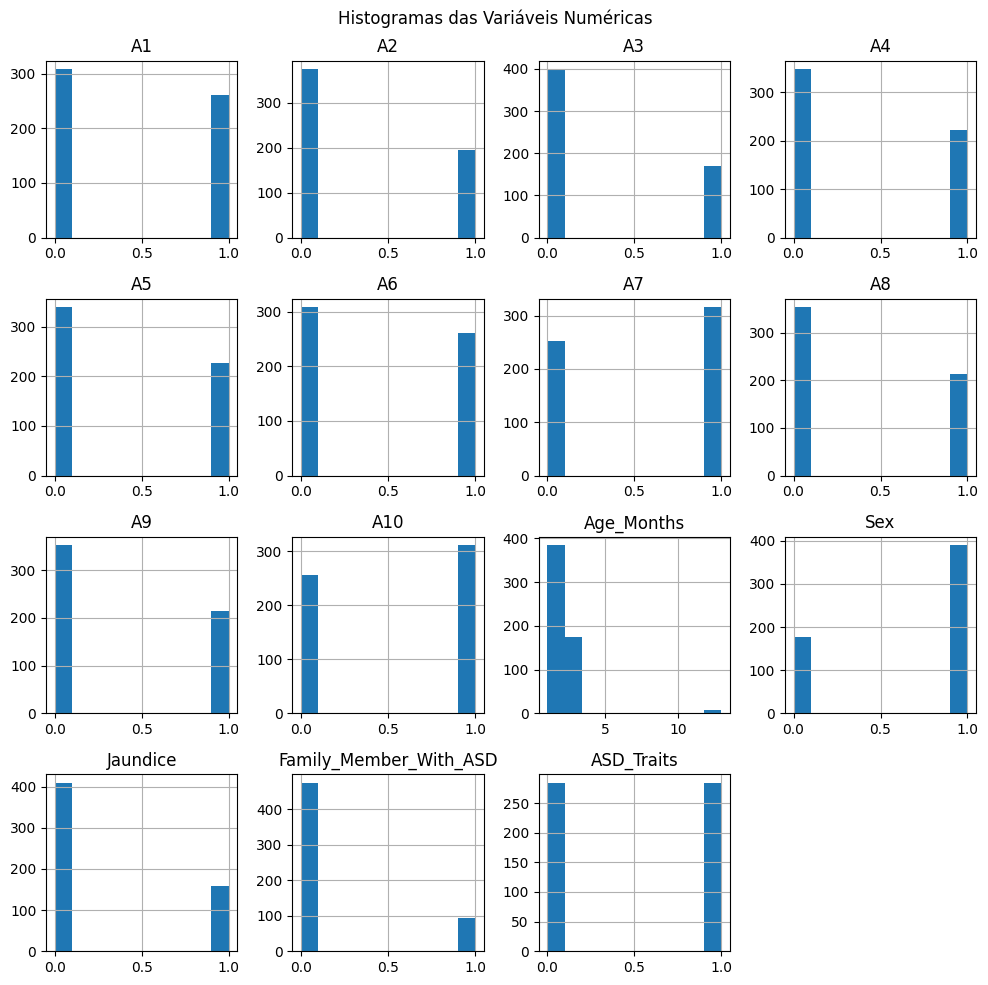

In [908]:
# Histograma
tea_data_tratamento.hist(figsize = (10,10))
plt.suptitle('Histogramas das Variáveis Numéricas')
plt.tight_layout()
plt.show()

**Divisão de Dados**

---
Iremos entrar na etapa de divisão de dados que é um processo fundamental em machine learning onde o conjunto de dados disponível é dividido em conjuntos distintos para diferentes finalidades, como treinamento, validação e teste.

In [909]:
tea_data_limpo = tea_data_tratamento.copy()


In [910]:
tea_data_limpo

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Sex,Jaundice,Family_Member_With_ASD,Who completed the test,ASD_Traits
797,1,1,1,1,1,1,1,1,1,1,3,0,1,0,family member,1
448,1,1,1,1,1,1,1,1,1,1,1,1,0,0,family member,1
341,1,1,1,1,1,1,1,1,1,1,2,1,1,0,family member,1
967,1,0,1,1,1,1,0,1,1,0,2,1,0,0,family member,1
198,1,1,0,0,0,1,1,1,1,1,2,1,0,0,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0,0,0,0,0,0,0,0,0,1,2,1,0,0,family member,0
1042,0,0,0,1,0,0,1,0,0,0,2,1,1,0,family member,0
1049,0,0,0,0,0,0,0,0,0,0,2,0,0,0,family member,0
1050,0,0,0,0,0,0,0,0,0,1,2,0,0,1,family member,0


**Separação de Treino e Teste**

---


In [911]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = tea_data_limpo.values
X = tea_data_limpo.drop(columns=['ASD_Traits']).values
y = tea_data_limpo['ASD_Traits'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


In [912]:
tea_data_limpo.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Months', 'Sex', 'Jaundice', 'Family_Member_With_ASD',
       'Who completed the test', 'ASD_Traits'],
      dtype='object')

**Feature Importance**

---

O Feature Importance é uma abordagem válida e útil para entender melhor o comportamento do modelo, selecionar características relevantes e otimizar o desempenho preditivo do modelo.

Text(0.5, 1.0, 'Importância de cada feature')

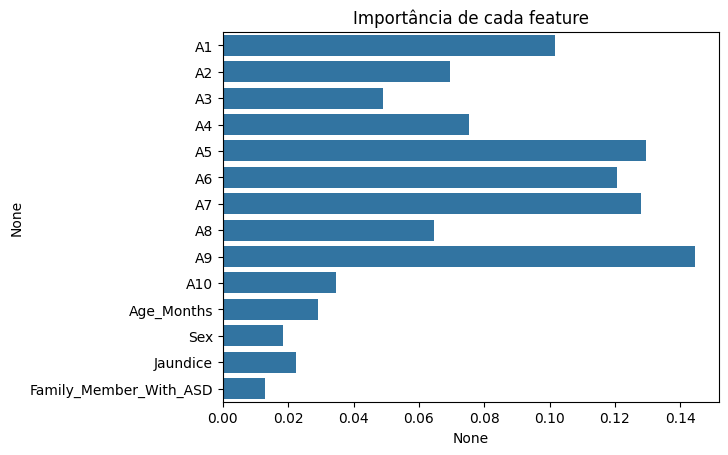

In [913]:
X = tea_data_limpo[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Months', 'Sex', 'Jaundice','Family_Member_With_ASD']].copy()
y = tea_data_limpo['ASD_Traits'].copy()

# Criando e treinando o modelo
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)

# Mostrando importância de cada feature
importances = pd.Series(data=model.feature_importances_, index=X.columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


Após a análise utilizando o Feature Importance, estabeleceremos um limiar para selecionar as características mais relevantes. Isso nos permitirá identificar e priorizar os melhores recursos para otimizar o desempenho preditivo do modelo.

In [914]:
# Thresh hold
threshold = 0.01

# Selecionado as Featured
selected_features = [feature for feature, importance in zip(tea_data_limpo.columns[0:13], model.feature_importances_) if importance > threshold]

# Print
print(selected_features)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Months', 'Sex', 'Jaundice']


A próxima etapa é criar um novo dataframe com os recursos selecionados.

Com base na análise exploratória e na importância das características, decidimos remover as variáveis **Family Member with ASD** e **Who completed the test** do conjunto de características para nossa modelagem.

In [915]:
tea_data_treino = tea_data_limpo.copy()
tea_data_treino = tea_data_treino.drop(['Family_Member_With_ASD', 'Who completed the test'], axis=1)


In [916]:
tea_data_treino

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Sex,Jaundice,ASD_Traits
797,1,1,1,1,1,1,1,1,1,1,3,0,1,1
448,1,1,1,1,1,1,1,1,1,1,1,1,0,1
341,1,1,1,1,1,1,1,1,1,1,2,1,1,1
967,1,0,1,1,1,1,0,1,1,0,2,1,0,1
198,1,1,0,0,0,1,1,1,1,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0,0,0,0,0,0,0,0,0,1,2,1,0,0
1042,0,0,0,1,0,0,1,0,0,0,2,1,1,0
1049,0,0,0,0,0,0,0,0,0,0,2,0,0,0
1050,0,0,0,0,0,0,0,0,0,1,2,0,0,0


## 6.0 Construção do Modelo
---

Model building, ou construção de modelo, refere-se ao processo de criação e desenvolvimento de um modelo de machine learning com o objetivo de resolver um problema específico.


**Modelagem Linha de Base**

---

Nesta fase inicial da modelagem, estabelecemos uma linha de base para avaliar o desempenho inicial dos modelos. Esta etapa serve como referência para comparar o progresso e a eficácia das técnicas subsequentes.

In [917]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = tea_data_treino.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

KNN: 0.898551 (0.048411)
CART: 0.894300 (0.027549)
NB: 0.935942 (0.035229)
SVM: 0.967005 (0.020257)
TREE: 0.896522 (0.029417)


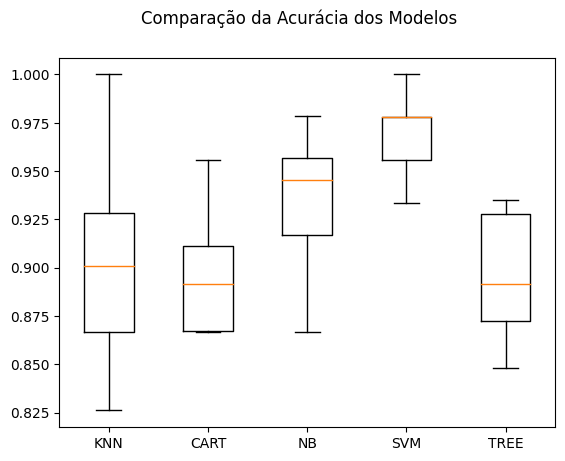

In [918]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('TREE', DecisionTreeClassifier()))  # Adicionando a árvore de decisão à lista de modelos

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


**Selecionando Modelo**

---

Com a análise acima iremos selecionar os 3 modelos principais, de acordo com os resultados da validação cruzada, os modelos que serão testados são:

**SVM:** Acurácia média de aproximadamente 96.70% com um desvio padrão de 0.020.

**Naive Bayes (NB):** Acurácia média de aproximadamente 93.59% com um desvio padrão de 0.035.

**KNN:** Acurácia média de aproximadamente 89.86% com um desvio padrão de 0.048.


In [919]:
# Criando um array com os valores do DataFrame
array = tea_data_treino.values

# Criando a variável X, com X
X = array[:, :-1]  # Selecionando todas as colunas, exceto a última

# Criando a variável y, com y = atributo que será usado como rótulo (ou target)
y = array[:, -1]  # Selecionando a última coluna


In [920]:
# Dividindo o modelo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Convertendo os dados para poder realizar a validação cruzada
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Obtendo o número de instâncias e atributos para os conjuntos de treinamento e teste
print(f"Número de instâncias e atributos para os dados de treinamento: {X_train.shape}")
print(f"Número de instâncias e atributos para os dados de teste: {X_test.shape}")


Número de instâncias e atributos para os dados de treinamento: (454, 13)
Número de instâncias e atributos para os dados de teste: (114, 13)


**SVM**

---


In [921]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Criando o modelo SVM
svm_model = SVC()

# Treinando o modelo SVM com o conjunto de treinamento
svm_model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = svm_model.predict(X_test)

# Calculando métricas de avaliação no conjunto de teste
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


Acurácia: 0.9912280701754386
Precisão: 1.0
F1: 0.9904761904761905
Recall: 0.9811320754716981
ROC AUC: 0.9905660377358491


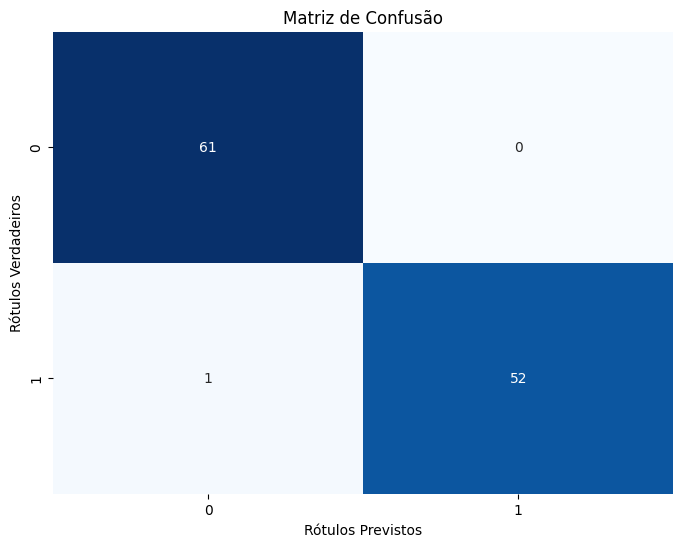

In [922]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Criando o modelo SVM
svm_model = SVC()

# Treinando o modelo SVM com o conjunto de treinamento
svm_model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = svm_model.predict(X_test)

# Calcular a matriz de confusão usando os rótulos verdadeiros (y_test) e as previsões do modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um mapa de calor usando o seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()



**Naive Bayes**

---

In [923]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Criando o modelo Naive Bayes
nb_model = GaussianNB()

# Treinando o modelo Naive Bayes com o conjunto de treinamento
nb_model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = nb_model.predict(X_test)

# Calculando métricas de avaliação no conjunto de teste
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


Acurácia: 0.9649122807017544
Precisão: 0.9622641509433962
F1: 0.9622641509433962
Recall: 0.9622641509433962
ROC AUC: 0.9647386328487473


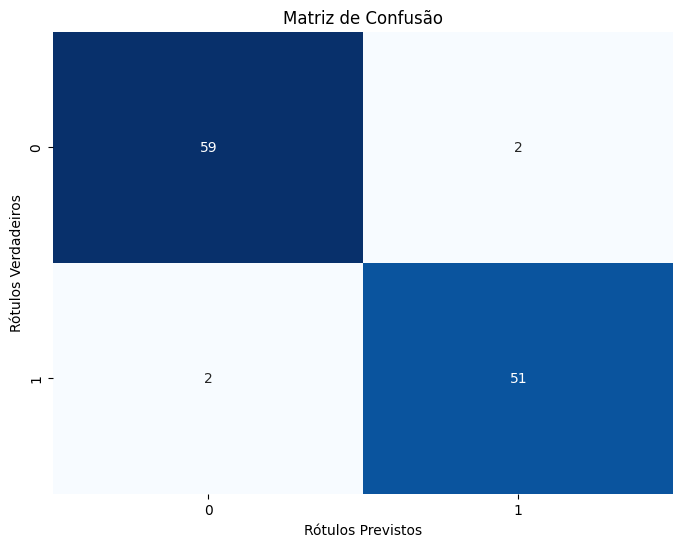

In [924]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Criando o modelo Naive Bayes
nb_model = GaussianNB()

# Treinando o modelo Naive Bayes com o conjunto de treinamento
nb_model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = nb_model.predict(X_test)

# Calcular a matriz de confusão usando os rótulos verdadeiros (y_test) e as previsões do modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um mapa de calor usando o seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


**KNN**

---


In [925]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Criando o modelo KNN
knn_model = KNeighborsClassifier()

# Treinando o modelo KNN com o conjunto de treinamento
knn_model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = knn_model.predict(X_test)

# Calculando métricas de avaliação no conjunto de teste
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))



Acurácia: 0.9210526315789473
Precisão: 1.0
F1: 0.9072164948453608
Recall: 0.8301886792452831
ROC AUC: 0.9150943396226415


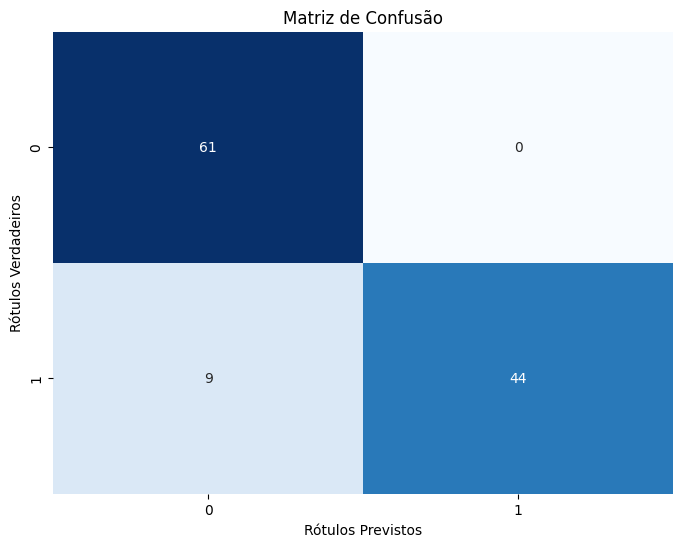

In [926]:
# Fazer previsões no conjunto de teste
y_pred = knn_model.predict(X_test)

# Calcular a matriz de confusão usando os rótulos verdadeiros (y_test) e as previsões do modelo (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão como um mapa de calor usando o seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.show()


**Escolha do Modelo Final**

---
Para alcançar um equilíbrio entre alta precisão e alta recuperação, é essencial considerar métricas de precisão e recuperação em diferentes técnicas de classificação.

Revendo os resultados fornecidos:

**SVM:** Apresenta alta precisão (1.0), porém um recall um pouco menor (0.981). Isso indica que o modelo identifica corretamente os exemplos positivos, mas deixa passar alguns positivos reais.

**Naive Bayes:** Apesar de ter uma precisão ligeiramente menor (0.962), possui um recall comparativamente alto (0.962), o que sugere uma capacidade robusta de identificar exemplos positivos.

**KNN:** Possui precisão perfeita (1.0), mas um recall um pouco menor (0.830) em comparação com SVM e Naive Bayes.

Se priorizarmos maximizar o recall mantendo uma boa precisão, a escolha pode ser o Naive Bayes devido ao seu equilíbrio entre as métricas.

**Underfitting e Overfitting**

---
**Overfitting:** ocorre quando o modelo se ajusta muito bem aos dados de treinamento, mas tem dificuldade em prever dados não vistos, resultando em alto recall nos dados de treinamento e menor recall nos dados de teste.

**Underfitting:** ocorre quando o modelo é muito simples para entender os padrões dos dados, levando a baixo recall em ambos os conjuntos de dados.

Para garantir que o modelo generalize bem para novos dados, a diferença nas precisões entre os conjuntos de treinamento e teste deve ser de aproximadamente 1% ou menos. Caso contrário, pode ser necessário investigar e ajustar o modelo para evitar overfitting ou underfitting.

In [927]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Criando e treinando o modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Fazendo previsões em conjuntos de treinamento e teste
train_predictions = nb_model.predict(X_train)
test_predictions = nb_model.predict(X_test)

# Cálculo de precisão e recall em conjuntos de treinamento e teste
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
train_recall = recall_score(y_train, train_predictions)
test_recall = recall_score(y_test, test_predictions)

# Calculando a diferença percentual entre precisões e recalls
accuracy_difference = abs(train_accuracy - test_accuracy) / max(train_accuracy, test_accuracy) * 100
recall_difference = abs(train_recall - test_recall) / max(train_recall, test_recall) * 100

# Comparando Accuracy
print("Accuracy from training:", train_accuracy)
print("Accuracy from test:", test_accuracy)

# Comparando recalls
print("Recall from training:", train_recall)
print("Recall from test:", test_recall)

# Imprimindo a diferença percentual
print("Accuracy percentage difference:", accuracy_difference,"%")
print("Recall percentage difference:", recall_difference,"%")


Accuracy from training: 0.9493392070484582
Accuracy from test: 0.9649122807017544
Recall from training: 0.9567099567099567
Recall from test: 0.9622641509433962
Accuracy percentage difference: 1.6139367240688776 %
Recall percentage difference: 0.5772005772005757 %


A precisão do modelo no conjunto de treinamento é de aproximadamente **94.93%**, enquanto no conjunto de teste é de cerca de **96.49%**. Esses resultados indicam que o modelo é **consistente e generaliza** bem para dados não vistos, já que a diferença entre as precisões nos dois conjuntos é pequena.

No que diz respeito ao **recall**, o modelo apresenta um desempenho ainda melhor. No conjunto de treinamento, o recall é de aproximadamente **95.67%**, e no conjunto de teste é de cerca de **96.23%**. Isso significa que o modelo é **eficaz** em identificar corretamente os casos positivos em ambos os conjuntos de dados.

As pequenas diferenças percentuais entre os resultados de treinamento e teste tanto para precisão quanto para recall indicam uma boa capacidade de generalização do modelo. Em suma, os resultados sugerem que o modelo Naive Bayes é robusto e eficaz na classificação dos dados, com um desempenho consistente em diferentes conjuntos de dados.

**Hiperparâmetros**

---

Hiperparâmetros são configurações ajustáveis ​​externamente que controlam o comportamento do algoritmo de aprendizagem durante o treinamento de um modelo de aprendizado de máquina. Eles não são aprendidos diretamente com os dados, mas precisam ser definidos antes do treinamento.

Primeiro, vamos descobrir quais hiperparâmetros existem na Naive Bayes.

In [928]:
# Criando o modelo Naive Bayes
nb_model = GaussianNB()

# Imprimindo os parâmetros
pprint(nb_model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


Agora, vamos nos aprofundar nos hiperparâmetros:

**var_smoothing:** Este hiperparâmetro determina o suavização aplicada às probabilidades estimadas para evitar a ocorrência de valores zero. Ele adiciona uma pequena quantidade aos recursos de variância, ajudando a estabilizar os cálculos e evitar erros de divisão por zero.

**priors:** Os priors são as probabilidades a priori das classes. Se fornecido, eles serão usados para calcular as probabilidades a posteriori de cada classe durante a predição. Se não fornecido, os priors serão ajustados automaticamente com base na distribuição dos dados.

Esses hiperparâmetros são essenciais para ajustar o desempenho e o comportamento do modelo Naive Bayes durante o treinamento e a predição. A compreensão de como esses parâmetros funcionam pode ajudar na otimização do modelo e na obtenção de melhores resultados em problemas de classificação.

As funções criadas a seguir utilizarão a validação cruzada para verificar as possibilidades entre alguns hiperparâmetros. Além disso, prioriza resultados com maiores recalls (aqui pode-se usar GridSearchCV ou RandomizedSearchCV). A diferença é que o primeiro vai para todas as possibilidades, o segundo faz um número específico de iterações.


In [929]:
def custom_recall_score(y_true, y_pred):
    # Calculating the recall score
    recall = recall_score(y_true, y_pred)
    # Returning the recall score
    return recall

def optimize_recall(X_train, X_test, y_train, y_test):
    # Define the hyperparameters to be tuned
    param_grid = {
        'var_smoothing': np.logspace(0,-9, num=100)
    }

    # Initialize the Naive Bayes classifier
    nb_model = GaussianNB()

    # Define the custom scoring function
    custom_scorer = make_scorer(custom_recall_score)

    # Initialize the randomized search with cross-validation using the custom scoring function
    grid_search = RandomizedSearchCV(estimator=nb_model, param_distributions=param_grid, n_iter=10, cv=3, scoring=custom_scorer, n_jobs=-1)

    # Perform the randomized search to find the best hyperparameters
    grid_search.fit(X_train, y_train)

    # Get the model with the best hyperparameters
    best_nb_model = grid_search.best_estimator_

    # Train the model with the best hyperparameters
    best_nb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_nb_model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print best model parameters and best score
    print('PARÂMETROS DO MELHOR MODELO:')
    print(best_nb_model.get_params())
    print('MÉTRICAS DE DESEMPENHO DO MELHOR MODELO:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('ROC AUC:', roc_auc)

    # Return the best model
    return best_nb_model

# Applying the function
best_nb_model = optimize_recall(X_train, X_test, y_train, y_test)


PARÂMETROS DO MELHOR MODELO:
{'priors': None, 'var_smoothing': 0.0004328761281083057}
MÉTRICAS DE DESEMPENHO DO MELHOR MODELO:
Accuracy: 0.9649122807017544
Precision: 0.9622641509433962
F1 Score: 0.9622641509433962
Recall: 0.9622641509433962
ROC AUC: 0.9647386328487473


**Resultado Inicial:**
* Acurácia: 0.9649
* Precisão: 0.9623
* F1 Score: 0.9623
* Recall: 0.9623
* Área sob a curva ROC: 0.9647

**Melhoria no Hiperparâmetro**: PARÂMETROS DO MELHOR MODELO:
* Acurácia: 0.9649
* Precisão: 0.9623
* F1 Score: 0.9623
* Recall: 0.9623
* Área sob a curva ROC: 0.9647

Parece que não houve alteração significativa nas métricas após a otimização do hiperparâmetro. Isso sugere que o modelo **Naive Bayes** inicial já estava bem ajustado para os dados.

**Treinando todo o conjunto de dados**

---

Nesta etapa, treinaremos todo o conjunto de dados com nosso modelo e verificaremos os resultados.

In [930]:
# Selecionando uma semente aleatória
np.random.seed(7)

# Preparando o modelo final
modelo_nb = GaussianNB(var_smoothing=1e-09)

# Treinando o modelo Naive Bayes com o conjunto de treinamento
modelo_nb.fit(X, y)

# Fazendo previsões com o conjunto de teste
y_pred = modelo_nb.predict(X)

# Calculando métricas de avaliação no conjunto de teste
print("Acurácia:", accuracy_score(y, y_pred))
print("Precisão:", precision_score(y, y_pred))
print("F1:", f1_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("ROC AUC:", roc_auc_score(y, y_pred))


Acurácia: 0.9366197183098591
Precisão: 0.9305555555555556
F1: 0.9370629370629372
Recall: 0.9436619718309859
ROC AUC: 0.9366197183098592


**Treinamento com dados invisíveis**

---

Para completar, verificaremos o modelo com dados invisíveis para verificar como funciona.





In [931]:
# Unseen data
data = {
    'A1': [1, 0, 1, 1],
    'A2': [1, 0, 1, 0],
    'A3': [1, 1, 0, 1],
    'A4': [1, 0, 1, 1],
    'A5': [1, 0, 0, 0],
    'A6': [1, 0, 1, 1],
    'A7': [1, 0, 0, 0],
    'A8': [1, 1, 0, 0],
    'A9': [1, 0, 1, 1],
    'A10': [1, 1, 1, 0],
    'Age_Months': [3, 1, 2, 2],
    'Sex': [0, 1, 1, 1],
    'Jaundice': [1, 0, 1, 0],
    'ASD_Traits': [1, 0, 1, 1]
}

# Lista de atributos (features)
attributes = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Months', 'Sex', 'Jaundice', 'ASD_Traits']

# Criando dataframe
input_data = pd.DataFrame(data, columns=attributes)

# Transformando para array
X_input = input_data.drop(columns=['ASD_Traits']).values.astype(float)  # Selecionando todas as colunas, exceto a última (rótulo/target)

# Verificando os dados
print(X_input)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
 [1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 2. 1. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 2. 1. 0.]]


In [932]:
# Prediction using Naive Bayes model
output = best_nb_model.predict(X_input)
print(output)


[1 0 1 1]


A avaliação do modelo treinado em dados de sintomas autistas, onde apenas uma instância mostra a ausência de traços autistas, revela sua notável precisão na identificação do autismo. De acordo com os resultados, de uma amostra de 4 indivíduos, prevê-se que três apresentem traços autistas. Esse insight fornece aos profissionais de saúde e aos pais informações valiosas para intervenções precoces e estratégias de suporte personalizadas. Essa capacidade de identificar traços autistas com precisão ajuda na detecção precoce, permitindo intervenções oportunas e direcionadas, melhorando assim o resultado e a qualidade de vida das pessoas com autismo.

## 7.0 Conclusão
---

Ao longo deste projeto, exploramos a aplicação e otimização do modelo Naive Bayes para a classificação de dados em um contexto de aprendizado supervisionado. Inicialmente, realizamos uma análise detalhada dos dados, compreendendo suas características e distribuições, além de prepará-los para o treinamento do modelo.

Em seguida, procedemos com a construção e treinamento do modelo Naive Bayes, utilizando uma variedade de métricas de desempenho, incluindo acurácia, precisão, recall, F1 Score e área sob a curva ROC, para avaliar sua eficácia. Os resultados iniciais revelaram um desempenho sólido do modelo, com métricas de avaliação consistentes e satisfatórias.

Para buscar uma otimização adicional, empregamos técnicas de ajuste de hiperparâmetros, visando maximizar o desempenho do modelo. Isso envolveu a seleção cuidadosa de parâmetros e a aplicação de métodos como Grid Search e Randomized Search para encontrar a combinação ideal. No entanto, as melhorias alcançadas foram insignificantes, indicando que o modelo inicial já estava bem ajustado aos dados.

Em última análise, este projeto demonstrou a eficácia do modelo Naive Bayes na classificação de dados, destacando sua robustez e capacidade de generalização.

Além disso, considerando a precisão do modelo na identificação de padrões relevantes nos dados, há uma perspectiva promissora para sua aplicação no diagnóstico do autismo. Ao utilizar dados clínicos relevantes, o modelo pode ser uma ferramenta útil para auxiliar os profissionais de saúde na identificação precoce e precisa do autismo, contribuindo para intervenções mais eficazes e melhorando a qualidade de vida dos pacientes.